#### Implementacja bibliotek

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

### Linear Congruential Generator

In [2]:
def LCG(a, c, m, n):
    x = [0]
    u = []
    for i in range(n):
        x[i] = ((a*x[i-1]+c) % m)
        x.append(x[i])
        u.append(x[i]/m)
    return u

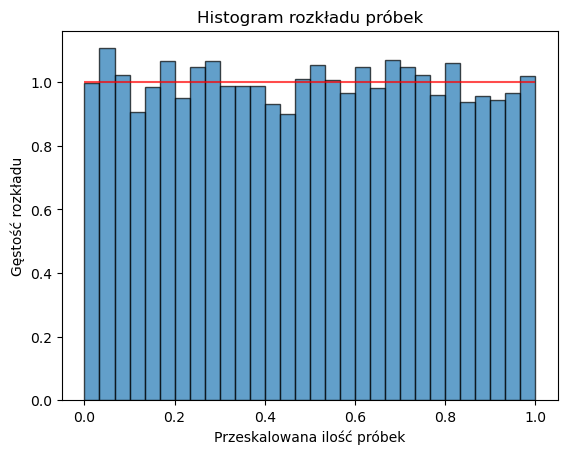

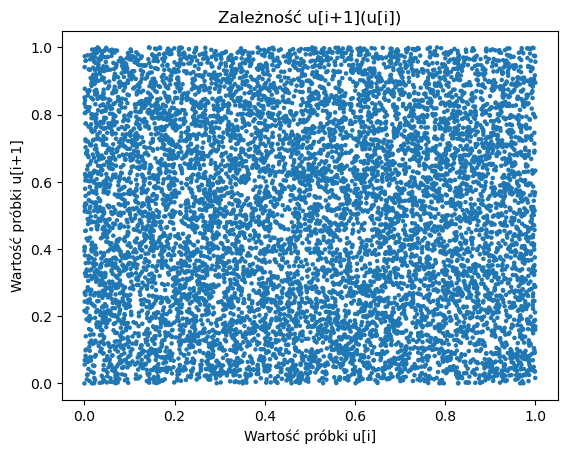

In [3]:
u = LCG(7**5, 3, 2**31-1, 10000)
plt.hlines(1, xmin=0,xmax=1, color='r', alpha=0.7)
plt.hist(u,density=True,bins=30,alpha=0.7,edgecolor='k')
plt.title('Histogram rozkładu próbek')
plt.ylabel('Gęstość rozkładu')
plt.xlabel('Przeskalowana ilość próbek')
plt.show()
v = []
for i in range(10000):
    v.append(5)
plt.scatter(u[:-1], u[1:],sizes=v)
plt.title('Zależność u[i+1](u[i])')
plt.xlabel('Wartość próbki u[i]')
plt.ylabel('Wartość próbki u[i+1]')
plt.show()

### Zadanie 1.1 - szacowanie liczby $\pi$

In [4]:
# Wbudowany generator liczb losowych:

def Szacowanie_wbudowane():
    quad = []                     # lista do której dodajemy wszystkie punkty (random,random)
    circle = []                   # lista do której dodajemy tylko punkty znajdujące się w ćwiartce okręgu o promieniu 1 (możemy ją dodatkowo zwrócić do sprawdzenia)
    pi = 0                        # do pi będziemy dodawać 1 za każdym razem gdy punkt znajdzie się wewnątrz okręgu

    for i in range(10000):
        quad.append([np.random.random(),np.random.random()])
        if quad[i][0]**2+quad[i][1]**2 <= 1:                   # warunek sprawdzający czy punkt wewnątrz okręgu
            circle.append(quad[i])
            pi += 1
    return 4*pi/10000                                          # pi - łączna liczba punktów, które są wewnątrz okręgu, pole ćwiartki to pi/4, zwracamy pi*4/liczba prób aby uzyskać pi

In [5]:
Szacowanie_wbudowane()

3.1444

In [6]:
def Szacowanie_LCG(a, c, m, n):
    """quadLCG - lista jako pole kwadratu (0,1)X(0,1)
       circleLCG - lista jako pole ćwiartki okręgu o promieniu 1"""                    
    quadLCG = []
    circleLCG = []
    piLCG = 0
    u = LCG(a, c, m, n)
    for i in range(10000):
        quadLCG.append([u[i],u[i+10000]])
        if quadLCG[i][0]**2+quadLCG[i][1]**2 <= 1:
            circleLCG.append(quadLCG[i])
            piLCG += 1
    return 4*piLCG/10000

In [7]:
Szacowanie_LCG(7**5, 3, 2**31-1, 20000)

3.1304

### Zadanie 1.2 - Symulacja N próbek przybliżenia liczby $\pi$

Symulacja 500 próbek przybliżeń $\pi$ z wykorzystaniem generatora wbudowanego:

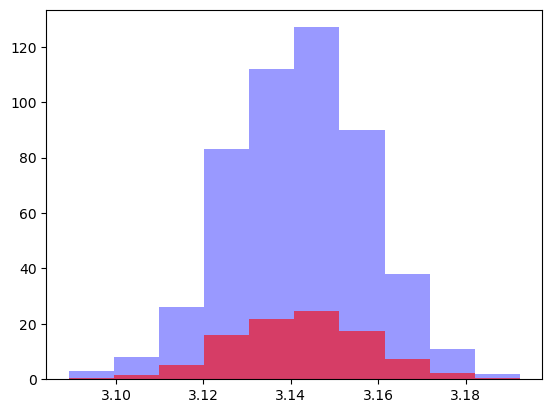

In [8]:
pisim = []
for i in range(500):
    pisim.append(Szacowanie_wbudowane())
#print(pisim)
plt.hist(pisim,bins=10,alpha=0.4,color='b')
plt.hist(pisim,bins=10,alpha=0.6,color='r',density=True)
plt.show() 

Symulacja 500 próbek przybliżeń $\pi$ z wykorzystaniem generatora LCG:

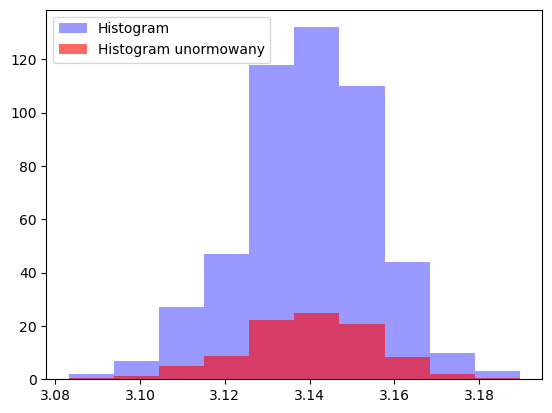

In [9]:
pisimLCG = []
for i in range(500): 
    pisimLCG.append(Szacowanie_LCG(7**5, i+2, 2**31-1, 20000)) #i+2 ponieważ dla i=1 nie jest dobrym argumentem dla LCG
#print(pisimLCG)
plt.hist(pisimLCG,bins=10,alpha=0.4,color='b')
plt.hist(pisimLCG,bins=10,alpha=0.6,color='r',density=True)
plt.legend(['Histogram','Histogram unormowany'])
plt.show()

Błędy oszacowania w obydwu próbach mają rozkład asymptotyczny normalny.

### Zadanie 1.3 - Igła Buffona 

Niech:

- N $-$ liczba realizacji eksperymentu,
- R $-$ liczba sukcesów eksperymentu (igła dotyka lub przecina linię),
- d $-$ odstęp między liniami równy długości igły
- X $-$ odległość środka igły od najbliższej linii
- $\Theta$ $-$ kąt ostry między igłą a linią

Zmienne losowe $X$ i $\Theta$ są niezależne i mają rozkład jednostajny:
$X$ ~ $U[0,\frac{d}{2}]$ oraz $\Theta$ ~ $U[0,\frac{\pi}{2}]$.

Igła przetnie linę jeśli $x \leq \frac{d}{2}\sin\theta$.

Prawdopodobieństwo $\frac{N}{R}$ wynosi zatem:

$$\int_{0}^{\frac{\pi}{2}}\int_{0}^{\frac{d}{2}\cdot \sin\theta}\frac{2}{\pi}\cdot\frac{2}{d}dxd\theta=\int_{0}^{\frac{\pi}{2}}[\frac{4}{\pi\cdot d}\cdot x]_{0}^{\frac{d}{2}\cdot\sin\theta}d\theta=\int_{0}^{\frac{\pi}{2}}\frac{4}{\pi\cdot d}\cdot \frac{d}{2}\cdot\sin\theta d\theta= \frac{2}{\pi}\int_{0}^{\frac{\pi}{2}}\sin\theta d\theta = \frac{2}{\pi}[-\cos\theta]_{0}^{\frac{\pi}{2}}=\frac{2}{\pi}.$$

Stąd $\pi$ możemy wyznaczyć jako:

$$\pi=\frac{2N}{R}$$

In [10]:
def LCG_igła(a, c, m, n):
    x = [0]
    u = []
    for i in range(n):
        x[i] = ((a*x[i-1]+c) % m)
        x.append(x[i])
        u.append(x[i]/m)
    return u

def Igła_LCG(a, c, m, n, d):
    """Prawdopodobieństwo sukcesu nie jest zależne od d - długość d dla formalności"""
    próby = []
    sukcesy = []
    piLCG = 0
    u = LCG(a, c, m, n)
    for i in range(10000):
        próby.append([float(u[i]*d/2),float(u[i+10000]*math.pi/2)])
        if próby[i][0] <= (d*math.sin(próby[i][1]))/2:
            sukcesy.append(próby[i])
            piLCG += 1
    return 2*n/2/piLCG               #ilość próbek to 1000, n = 2000 więc skalujemy przez 2 wynik teoretyczny
    

In [11]:
Igła_LCG(7**5, 3, 2**31-1, 20000,8)

3.0783438510081576

Symulacja 500 próbek przybliżenia $\pi$ z wykorzystaniem generatora LCG

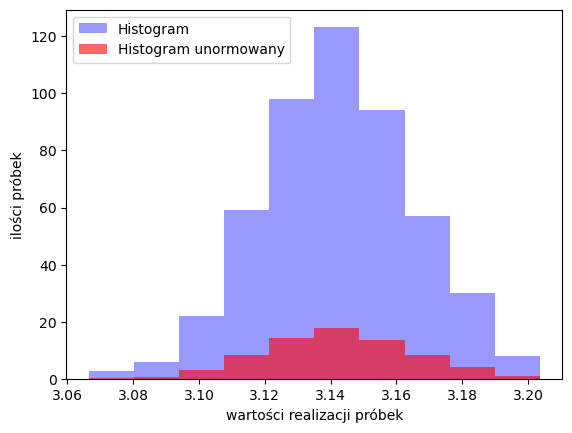

3.1420550997643555


In [12]:
pisimLCG = []
for i in range(500): 
    pisimLCG.append(Igła_LCG(7**5, i+2, 2**31-1, 20000,10)) #i+2 ponieważ dla i=1 nie jest dobrym argumentem dla LCG
#print(pisimLCG)
plt.hist(pisimLCG,bins=10,alpha=0.4,color='b')
plt.hist(pisimLCG,bins=10,alpha=0.6,color='r',density=True)
plt.legend(['Histogram','Histogram unormowany'])
plt.ylabel('ilości próbek')
plt.xlabel('wartości realizacji próbek')
plt.show()
pi = 0
for i in range(500):
    pi += pisimLCG[i]
print(pi/500)

### Zadanie 2

Pomysł: Symulacja N następujących prób:

Generujemy niezależne zmienne losowe z rozkładu U(0,1)

Jeśli wartość $x_{i}$ <=0.5 to przypisujemy O, jeśli > 0.5 przypisujemy R

Jeśli dwa ostatnie elementy listy do której dodajemy o i r to [...,o,o], to znaczy że wygrał gracz A, a jeśli trzy ostatnie to R,O,R, to wygrał gracz B.


In [30]:
def G_L_P(n):
    lista = []
    o = 0
    r = 0
    for i in range(n):
        x = np.random.random(size=1)
        if x <= 0.5:
            lista.append('O')
            o+=1
        else:
            lista.append('R')
            r+=1
    return lista

In [31]:
lista = G_L_P(100000)             # dodatkowy fragment algorytmu do symulacji kto i w którym rzucie wygrywa
wygrana = 0
for a in range(2,100):
        if lista[a-1] == 'O' and lista[a-2] =='O':
            print('wygrał gracz A',a+1)                  ##### dopiszemy w którym rzucie zakończyli rzucać
            wygrana += 1
            break
        elif lista[a] == 'R' and lista[a-1] == 'O' and lista[a-2] == 'R':
            print('wygrał gracz B',a+1)
            wygrana += 1
            break
if wygrana == 0:
    print('nikt nie wygrał')

wygrał gracz B 5


In [32]:
lista = G_L_P(1000000)
def P_W_A(i):
    wygrana_A = 0
    for a in range(2+i,1000+i):
         if lista[a-1] == 'O' and lista[a-2] =='O':         # jeśli wygrywa A to dodajemy 1 do wygrana_A i przerywamy tą symulację
            wygrana_A+=1
            break
         elif lista[a] == 'R' and lista[a-1] == 'O' and lista[a-2] == 'R': # jeśli wyg B to przerywamy tą symulację
            break
    return wygrana_A

In [33]:
wygrana_A = 0

for i in range(999000):
    wygrana_A+=P_W_A(i)                          # wykonujemy 999000 symulacji
print('Prawdopodobieństwo takiego zdarzenia, że wygra gracz A wynosi: ',wygrana_A/999000) # zwracamy uśredniony wynik - prawdopodobieństwo

Prawdopodobieństwo takiego zdarzenia, że wygra gracz A wynosi:  0.6245405405405405


### Zadanie 3 - Ciąg van der Corputa

In [34]:
def reversal(x,p):
    new = []
    while x :
        x, mod = divmod(x,p)
        new.append(mod)
        
    return new

def kwazilosowa(x,p):
    numbers = reversal(x,p)
    result = 0
    il = 1/p
    for number in numbers:
        result = result + il*number
        il = il * 1/p
        
    return result

def van_der_corput(n,p):
    result = []

    for i in range(n+1):
        result.append(kwazilosowa(i,p))
        
    return result


In [35]:
def z3():
    x = van_der_corput(1000,7)
    y = van_der_corput(1000,3)
    
    h = 0
    
    for i in range(len(x)):
        x_i, y_i = x[i],y[i]
        
        if x_i**2 + y_i**2 < 1:
            h+=1
    
    p = 4*h/len(x)

    return p

In [37]:
print(z3())

3.144855144855145
